<div class="alert alert-block alert-success">
    <h1 align="center">Practice Linear Regression in Python</h1>
    <h3 align="center">simple Linear Regression</h3>
    <h3 align="center">multiple Linear Regression</h3>
    <h3 align="center">Model(MLR) Evaluation</h3>
    <h3 align="center">Polynomial Regression</h3>
</div>

<img src="https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2020/03/back-bay-brownstone.jpg" />

In [842]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_boston

In [843]:
boston = pd.read_excel("Boston.xlsx")

<img src="https://editor.analyticsvidhya.com/uploads/87851lr.png" />

In [844]:
import sklearn
print(sklearn.__version__)

1.0.2


In [845]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [846]:
print(type(boston))

<class 'pandas.core.frame.DataFrame'>


In [847]:
boston.drop(columns="Unnamed: 0", inplace=True)

In [848]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [849]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [850]:
boston.shape

(506, 14)

In [851]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [852]:
boston.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [853]:
boston.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 506 entries, 0 to 505

Data columns (total 14 columns):

 #   Column   Non-Null Count  Dtype  

---  ------   --------------  -----  

 0   crim     506 non-null    float64

 1   zn       506 non-null    float64

 2   indus    506 non-null    float64

 3   chas     506 non-null    int64  

 4   nox      506 non-null    float64

 5   rm       506 non-null    float64

 6   age      506 non-null    float64

 7   dis      506 non-null    float64

 8   rad      506 non-null    int64  

 9   tax      506 non-null    int64  

 10  ptratio  506 non-null    float64

 11  black    506 non-null    float64

 12  lstat    506 non-null    float64

 13  medv     506 non-null    float64

dtypes: float64(11), int64(3)

memory usage: 55.5 KB


In [854]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [855]:
boston.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [856]:
boston.isnull().sum().sum()

0

In [857]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Corr

corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

In [858]:
corr = boston.corr()
corr.shape

(14, 14)

In [859]:
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

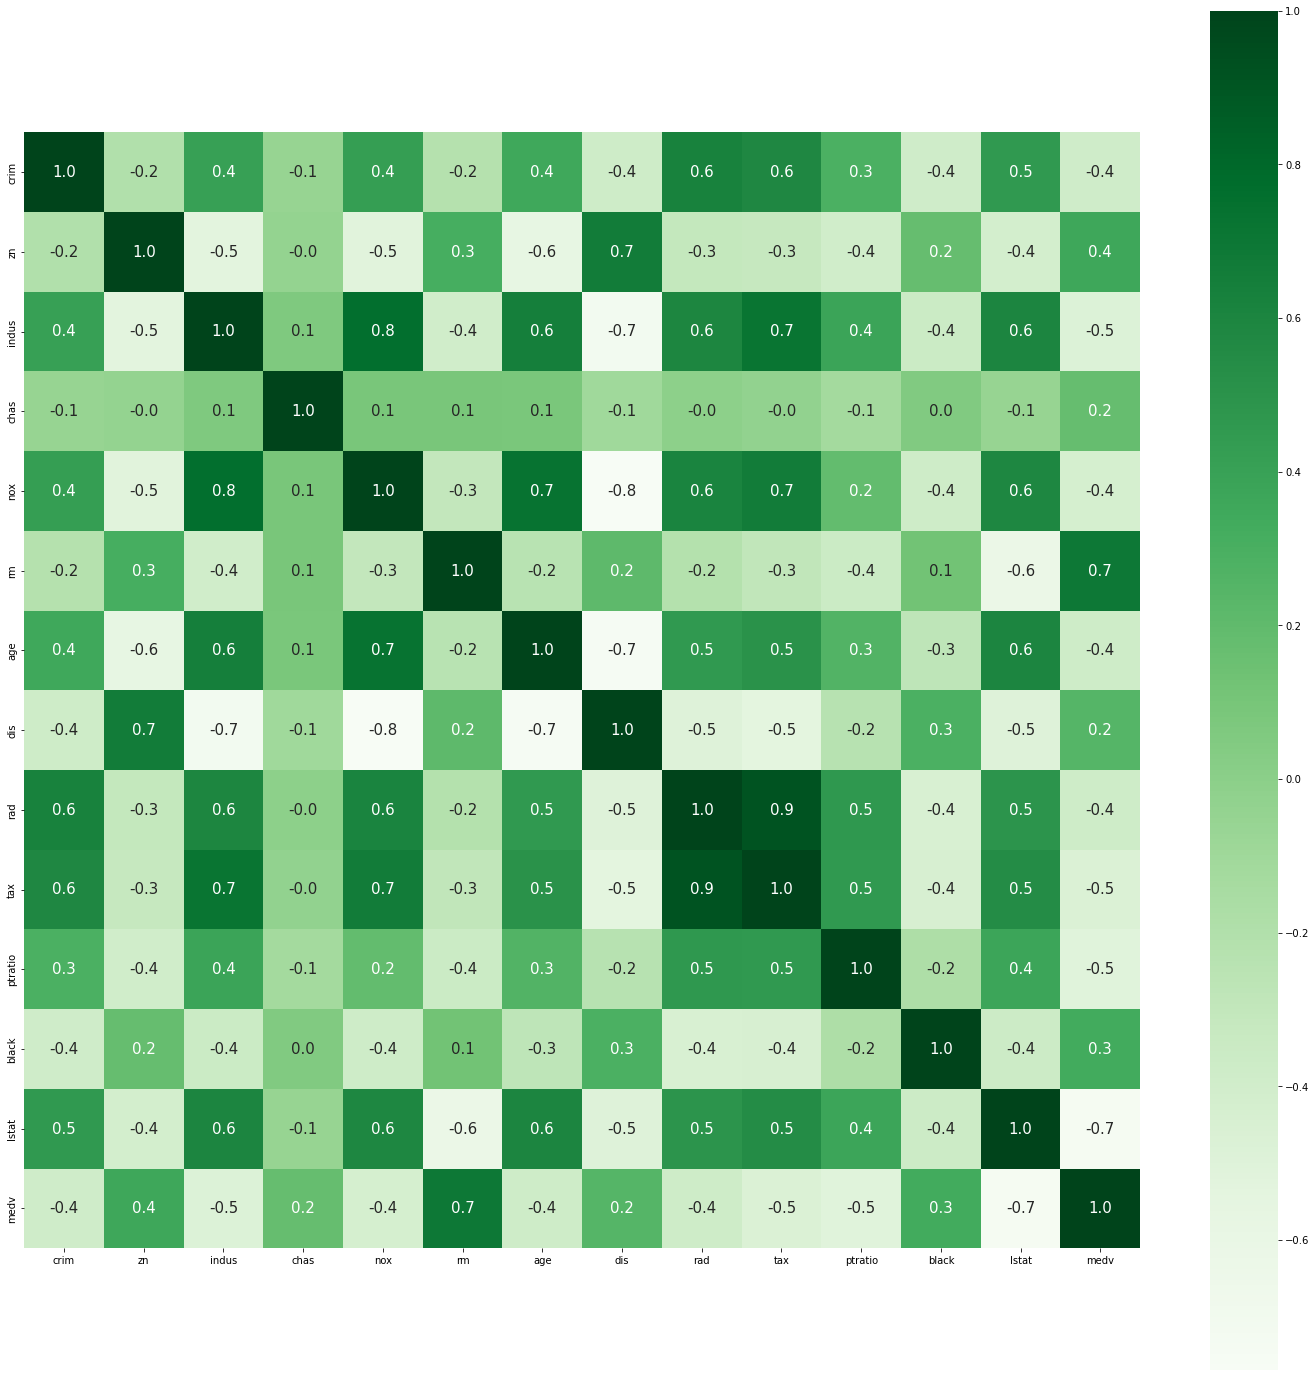

In [860]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

<AxesSubplot:>

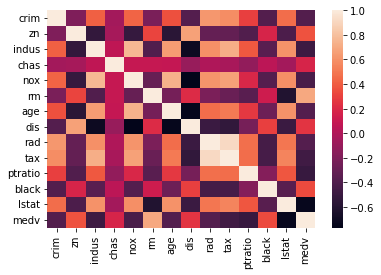

In [861]:
sns.heatmap(corr)

<img src="https://miro.medium.com/max/875/1*XSBSL7LbDOvjXyi4wz-i_g.png" width=75% />

# Simple Linear Regression

<img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/Simple%20Linear%20Regression%20graph.png" />

# rm

In [862]:
X = boston[['rm']]
y = boston[['medv']]

In [863]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [864]:
from sklearn.linear_model import LinearRegression
slr1 = LinearRegression()
slr1.fit(X_train, y_train)

LinearRegression()

In [865]:
slr1.intercept_

array([-33.85004607])

In [866]:
slr1.coef_

array([[8.96006106]])

In [867]:
coeffcients = pd.DataFrame([X_train.columns, slr1.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coeffcients'})
coeffcients

,Attribute,Coeffcients
0,rm,[8.960061060588053]


Evaluation metric

In [868]:
from sklearn import metrics

In [869]:
y_pred_train = slr1.predict(X_train)
y_pred_test = slr1.predict(X_test)

In [870]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.465660240467901

R^2: 0.5065734010320511


In [871]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 4.285598930785463

MAE: 4.853146476052217


In [872]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 40.22019702170216

MSE: 51.52364113002358


In [873]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 6.341939531539398

RMSE: 7.1779970137931635


# Model(MLR) Evaluation (rm)

Visualizing

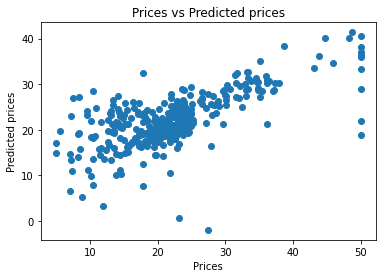

In [874]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

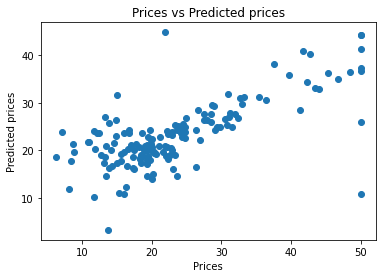

In [875]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

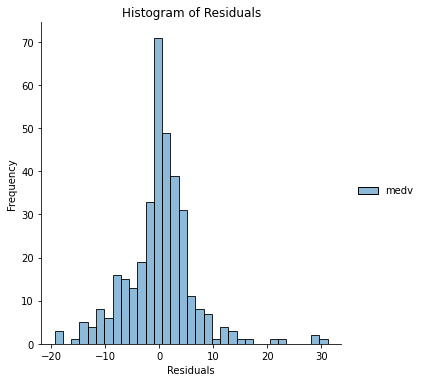

In [876]:
sns.displot(y_train-y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

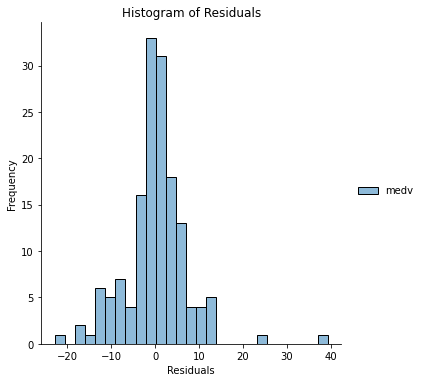

In [877]:
sns.displot(y_test-y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (rm)

In [878]:
from sklearn.preprocessing import PolynomialFeatures

In [879]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [880]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.5608902449488427

R^2: 0.5414725672598502


In [881]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 4.082273665168397

MAE: 4.546189168328596


In [882]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 33.05215557564735

MSE: 47.87946766994029


In [883]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.749100414468976

RMSE: 6.919499090970407


In [884]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [885]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.5618754641344953

R^2: 0.5815607122847044


In [886]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 4.063141063112365

MAE: 4.480197804714035


In [887]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 32.97799731014375

MSE: 43.69346066879949


In [888]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.742647238873702

RMSE: 6.610102924221338


# lstat

In [889]:
X = boston[['lstat']]
y = boston[['medv']]

In [890]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [891]:
slr2 = LinearRegression()
slr2.fit(X_train, y_train)

LinearRegression()

In [892]:
slr2.intercept_

array([33.64814631])

In [893]:
slr2.coef_

array([[-0.90248701]])

In [894]:
coeffcients = pd.DataFrame([X_train.columns, slr2.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coeffcients'})
coeffcients

,Attribute,Coeffcients
0,lstat,[-0.9024870147192383]


Evaluation Metric

In [895]:
y_pred_train = slr2.predict(X_train)
y_pred_test = slr2.predict(X_test)

In [896]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.5430473061395535

R^2: 0.5336737204440606


In [897]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 4.235587804993463

MAE: 4.8399529402570804


In [898]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 34.395208383441776

MSE: 48.69382381816016


In [899]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 5.864742823299396

RMSE: 6.978096002360541


# Model(MLR) Evaluation (lstat)

Visualizing

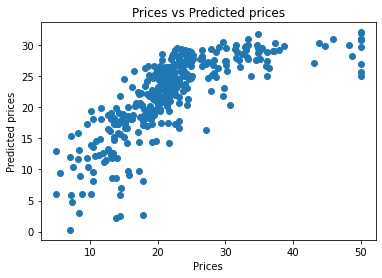

In [900]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

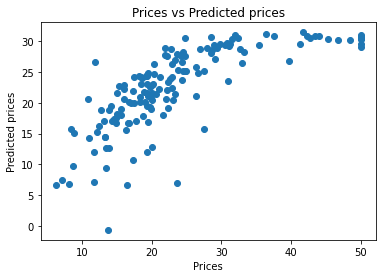

In [901]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

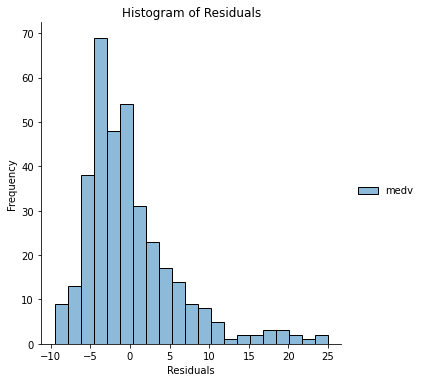

In [902]:
sns.displot(y_train-y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

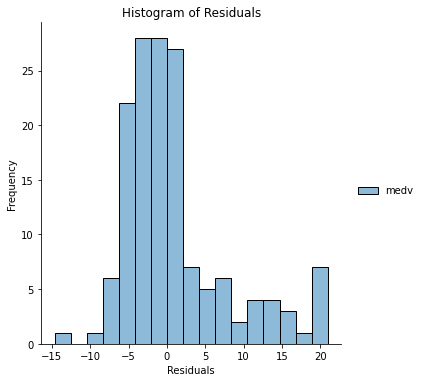

In [903]:
sns.displot(y_test-y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (lstat)

In [904]:
from sklearn.preprocessing import PolynomialFeatures

In [905]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [906]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.617484349823296

R^2: 0.6902769560415493


In [907]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.896559086209691

MAE: 4.29324923355995


In [908]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 28.792270347734316

MSE: 32.341302637497876


In [909]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.365842929841901

RMSE: 5.6869414132288965


In [910]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [911]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6279560327772773

R^2: 0.7165595624775569


In [912]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.8642128815422665

MAE: 4.184858430222849


In [913]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 28.004058083824308

MSE: 29.596870973694386


In [914]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.291886061115102

RMSE: 5.440300632657573


# tax

In [915]:
X = boston[['tax']]
y = boston[['medv']]

In [916]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [917]:
slr3 = LinearRegression()
slr3.fit(X_train, y_train)

LinearRegression()

In [918]:
slr3.intercept_

array([32.60069459])

In [919]:
slr3.coef_

array([[-0.02537016]])

In [920]:
coeffcients = pd.DataFrame([X_train.columns, slr3.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coeffcients'})
coeffcients

,Attribute,Coeffcients
0,tax,[-0.02537016110621822]


In [921]:
y_pred_train = slr3.predict(X_train)
y_pred_test = slr3.predict(X_test)

In [922]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.24741685290505167

R^2: 0.16023691495101833


In [923]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 5.421377103620502

MAE: 6.682592831090676


In [924]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 56.64755787193702

MSE: 87.68812204044902


In [925]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 7.52645719259314

RMSE: 9.364193613998433


# Model(MLR) Evaluation (tax)

Visualizing

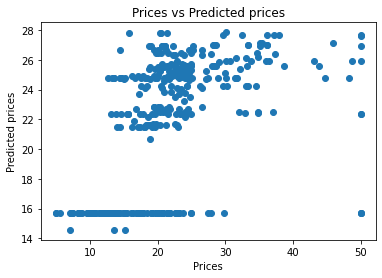

In [927]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

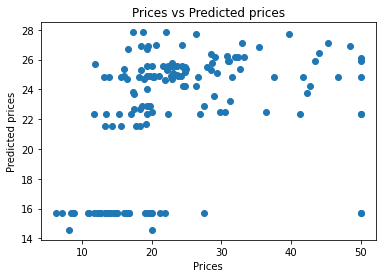

In [928]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

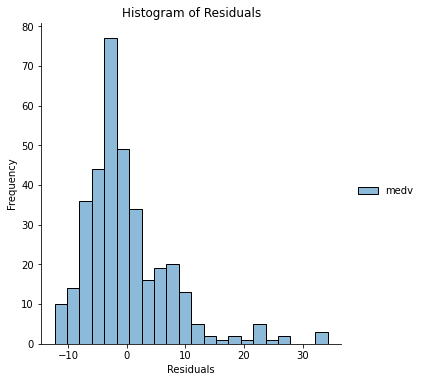

In [929]:
sns.displot(y_train-y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

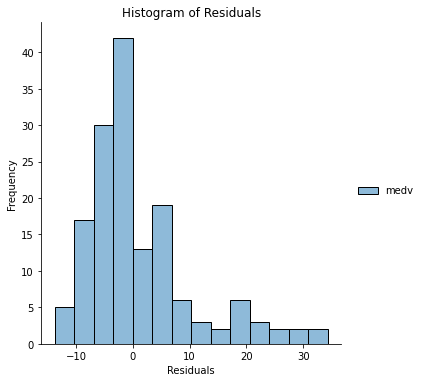

In [930]:
sns.displot(y_test-y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (tax)

In [931]:
from sklearn.preprocessing import PolynomialFeatures

In [932]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [933]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.25801397683482774

R^2: 0.1692908189359973


In [934]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 5.326748941848633

MAE: 6.925234180545833


In [935]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 55.84990356170525

MSE: 86.74271273190453


In [936]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 7.473279304408825

RMSE: 9.313576795834377


In [937]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [938]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.26261322503940676

R^2: 0.1694856692508675


In [939]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 5.297261384136802

MAE: 6.919755485692062


In [940]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 55.50371433352229

MSE: 86.72236644794164


In [941]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 7.450081498448342

RMSE: 9.31248444014494


# ptratio

In [942]:
X = boston[['ptratio']]
y = boston[['medv']]

In [943]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [944]:
slr4 = LinearRegression()
slr4.fit(X_train, y_train)

LinearRegression()

In [945]:
slr4.intercept_

array([58.08784688])

In [946]:
slr1.coef_

array([[8.96006106]])

In [947]:
coeffcients = pd.DataFrame([X_train.columns, slr4.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coeffcients'})
coeffcients

,Attribute,Coeffcients
0,ptratio,[-1.9453303074439598]


In [948]:
y_pred_train = slr4.predict(X_train)
y_pred_test = slr4.predict(X_test)

In [949]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.23742591304984717

R^2: 0.27231328496917606


In [950]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 5.532362101434869

MAE: 6.179577227994488


In [951]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 57.399584203947526

MSE: 75.98509938206496


In [952]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 7.576251329249019

RMSE: 8.716943236138741


# Model(MLR) Evaluation (ptratio)

Visualizing

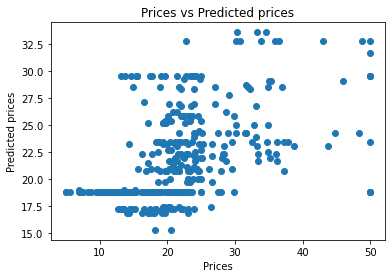

In [953]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

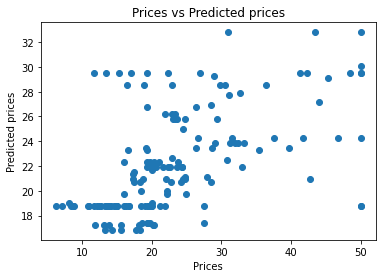

In [954]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

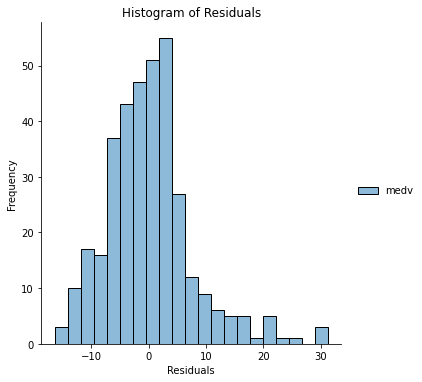

In [955]:
sns.displot(y_train-y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

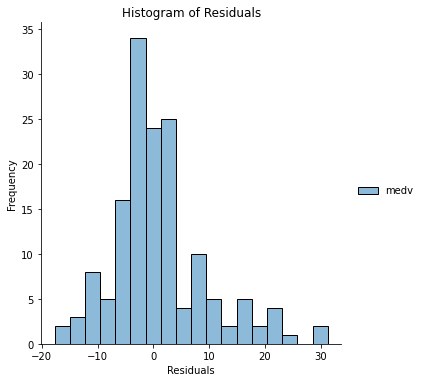

In [956]:
sns.displot(y_test-y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (ptratio)

In [957]:
from sklearn.preprocessing import PolynomialFeatures

In [958]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [959]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.24100025585017937

R^2: 0.3094233343070232


In [960]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 5.563686344245339

MAE: 6.184570017416927


In [961]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 57.13054045586793

MSE: 72.11006534782372


In [962]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 7.5584747440120434

RMSE: 8.491764560315113


In [963]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [964]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.2499677988711737

R^2: 0.31320688509617234


In [965]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 5.546806910498012

MAE: 6.1973054952483935


In [966]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 56.45554605264251

MSE: 71.7149867009387


In [967]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 7.513690574720423

RMSE: 8.468470151151193


# Multiple Linear Regression

<img src="https://static-assets.codecademy.com/skillpaths/master-stats-ii/advanced-linear-regression/e6_quantlines3.svg" />

# rm and lstat

In [969]:
X = boston[['rm', 'lstat']]
y = boston[['medv']]

In [970]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [971]:
mlr21 = LinearRegression()
mlr21.fit(X_train, y_train)

LinearRegression()

In [972]:
mlr21.intercept_

array([-0.35788359])

In [973]:
mlr21.coef_

array([[ 4.87756818, -0.62557605]])

In [974]:
coeffcients = pd.DataFrame([X_train.columns,mlr21.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,rm,"[4.8775681764020264, -0.6255760519474055]"
1,lstat,None


In [975]:
y_pred_train = mlr21.predict(X_train)
y_pred_test = mlr21.predict(X_test)

In [976]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.6299139884811162

R^2: 0.6459043417253267

MAE: 3.8058176773209373

MAE: 4.252167204642056

MSE: 27.8566811335537

MSE: 36.97469423173275

RMSE: 5.277942888432357

RMSE: 6.080682053169097


# Model(MLR) Evaluation (rm and lstat)

Visualizing

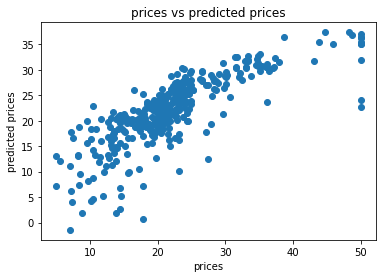

In [981]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

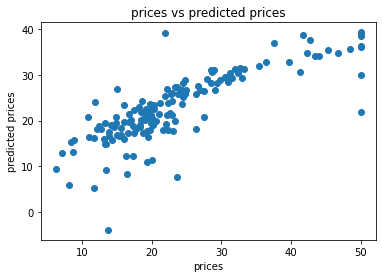

In [982]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

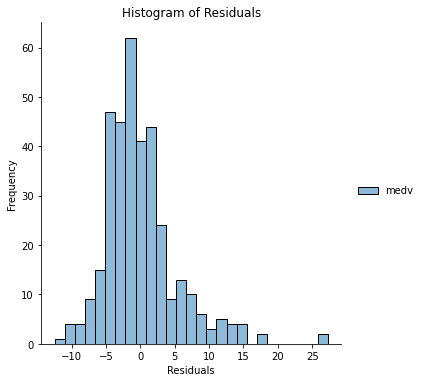

In [983]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

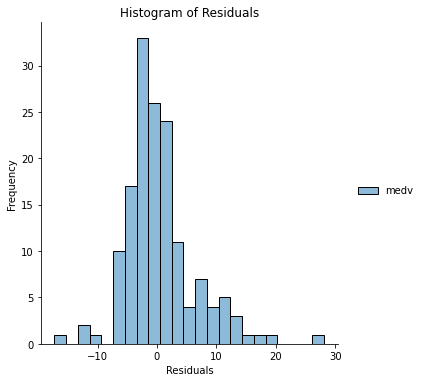

In [984]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (rm and lstat)

In [985]:
from sklearn.preprocessing import PolynomialFeatures

In [986]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [987]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.7660527611854564

R^2: 0.7663423573683006


In [988]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.966865945158958

MAE: 3.4810632097082697


In [989]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 17.60940276284814

MSE: 24.39854793281012


In [990]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.196355890871048

RMSE: 4.93948863069955


In [991]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [992]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.7834718260876028

R^2: 0.8235646834154757


In [993]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.759690745493093

MAE: 3.0653973551877454


In [994]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 16.29825529571668

MSE: 18.42338851082816


In [995]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.037109770085114

RMSE: 4.2922474894661145


# rm and tax

In [996]:
X = boston[['rm', 'tax']]
y = boston[['medv']]

In [997]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [998]:
mlr22 = LinearRegression()
mlr22.fit(X_train, y_train)

LinearRegression()

In [999]:
mlr22.intercept_

array([-19.20075296])

In [1000]:
mlr22.coef_

array([[ 7.59833232, -0.01487277]])

In [1001]:
coeffcients = pd.DataFrame([X_train.columns,mlr22.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,rm,"[7.598332315058102, -0.014872766700192035]"
1,tax,None


In [1002]:
y_pred_train = mlr22.predict(X_train)
y_pred_test = mlr22.predict(X_test)

In [1003]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.5399336548651668

R^2: 0.5854936661285823

MAE: 3.9291898781644456

MAE: 4.322134421505015

MSE: 34.62957549814492

MSE: 43.28278134414056

RMSE: 5.88468992370413

RMSE: 6.5789650663414045


# Model(MLR) Evaluation (rm and tax)

Visualizing

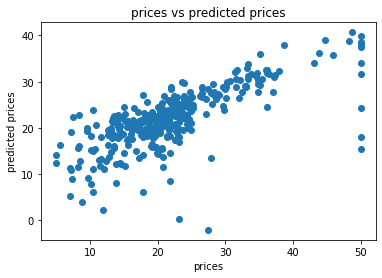

In [1004]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

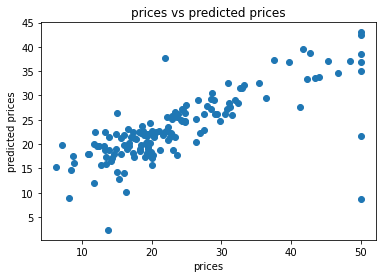

In [1005]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

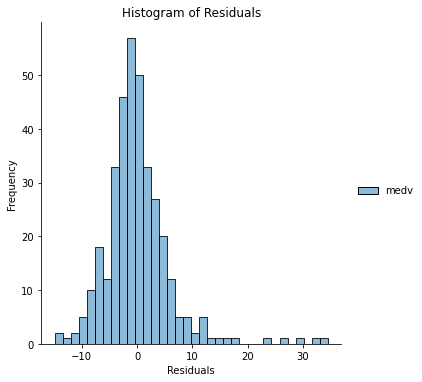

In [1006]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

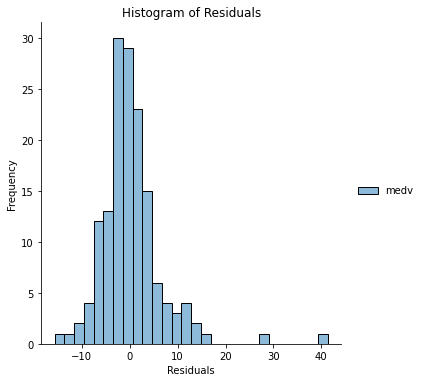

In [1007]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (rm and tax)

In [1008]:
from sklearn.preprocessing import PolynomialFeatures

In [1009]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1010]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.658160485428495

R^2: 0.693850456893264


In [1011]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.3808255465386967

MAE: 3.6975981514101703


In [1012]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 25.730543873262036

MSE: 31.968157420262557


In [1013]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.072528351154091

RMSE: 5.654039035969115


In [1014]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1015]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.665536616580264

R^2: 0.7193474365733549


In [1016]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.3610979847859985

MAE: 3.502092147700188


In [1017]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 25.175336361768142

MSE: 29.305760959098446


In [1018]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.017503000673557

RMSE: 5.413479561160128


# rm and ptratio

In [1019]:
X = boston[['rm', 'ptratio']]
y = boston[['medv']]

In [1020]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1021]:
mlr23 = LinearRegression()
mlr23.fit(X_train, y_train)

LinearRegression()

In [1022]:
mlr23.intercept_

array([-4.86828313])

In [1023]:
mlr23.coef_

array([[ 7.6575302 , -1.12748082]])

In [1024]:
coeffcients = pd.DataFrame([X_train.columns,mlr23.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,rm,"[7.657530198929523, -1.1274808168327528]"
1,ptratio,None


In [1025]:
y_pred_train = mlr23.predict(X_train)
y_pred_test = mlr23.predict(X_test)

In [1026]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.5355749354933734

R^2: 0.5954142347766742

MAE: 4.021917467488186

MAE: 4.352731755623171

MSE: 34.9576599215263

MSE: 42.24687484882969

RMSE: 5.912500310488474

RMSE: 6.499759599310554


# Model(MLR) Evaluation (rm and ptratio)

Visualizing

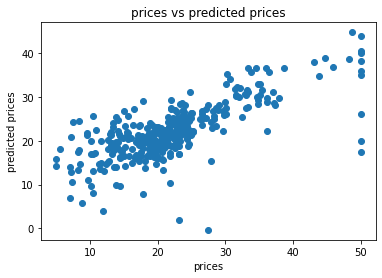

In [1027]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

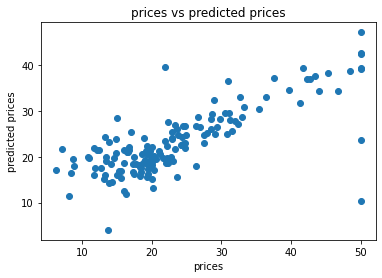

In [1028]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

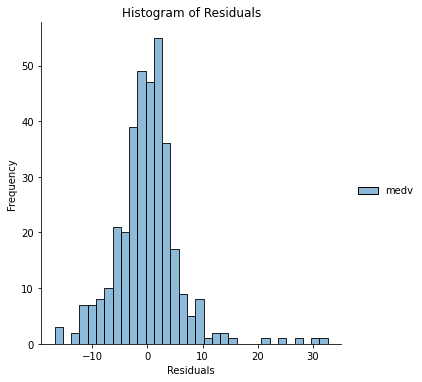

In [1029]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

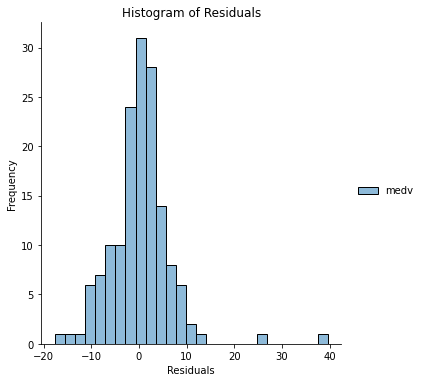

In [1030]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (rm and ptratio)

In [1031]:
from sklearn.preprocessing import PolynomialFeatures

In [1032]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1033]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6328607129878643

R^2: 0.700755846662872


In [1034]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.681057945525708

MAE: 3.7993511396807707


In [1035]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 27.634878735143626

MSE: 31.24709612138568


In [1036]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.256888693432992

RMSE: 5.589910206916179


In [1037]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1038]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6442072820109107

R^2: 0.7185905502009984


In [1039]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.619757710570752

MAE: 3.635407052691444


In [1040]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 26.780813070954814

MSE: 29.38479508880907


In [1041]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.175018171074843

RMSE: 5.4207743993648245


# lstat and tax

In [1043]:
X = boston[['lstat', 'tax']]
y = boston[['medv']]

In [1044]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1045]:
mlr24 = LinearRegression()
mlr24.fit(X_train, y_train)

LinearRegression()

In [1046]:
mlr24.intercept_

array([34.97111399])

In [1047]:
mlr24.coef_

array([[-0.82520907, -0.00559271]])

In [1048]:
coeffcients = pd.DataFrame([X_train.columns,mlr24.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,lstat,"[-0.8252090687065233, -0.005592707382622091]"
1,tax,None


In [1049]:
y_pred_train = mlr24.predict(X_train)
y_pred_test = mlr24.predict(X_test)

In [1050]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.551089013744462

R^2: 0.5368079696871775

MAE: 4.170503956022667

MAE: 4.734647836973695

MSE: 33.789902380116175

MSE: 48.36654528564455

RMSE: 5.812908254919922

RMSE: 6.954606048198888


# Model(MLR) Evaluation (lstat and tax)

Visualizing

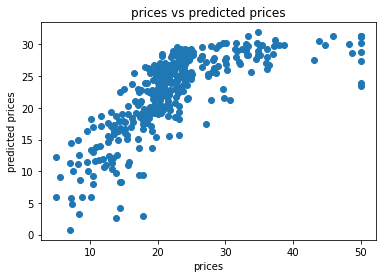

In [1051]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

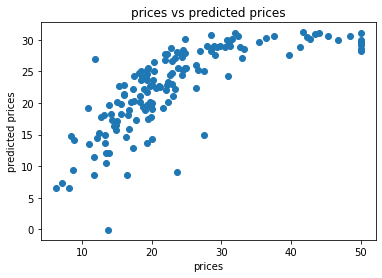

In [1052]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

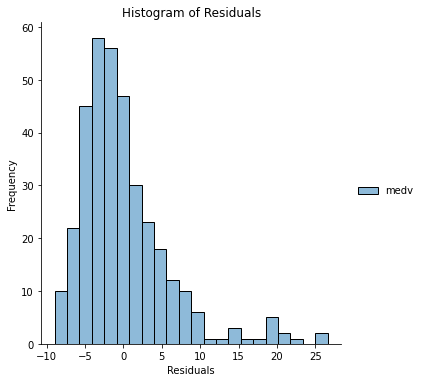

In [1053]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

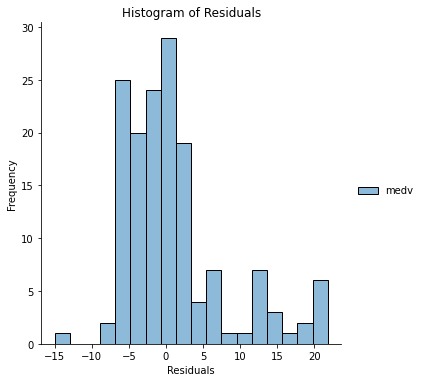

In [1054]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (lstat and tax)

In [1056]:
from sklearn.preprocessing import PolynomialFeatures

In [1057]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1058]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6474134920722876

R^2: 0.7219072004421001


In [1059]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.803918487442699

MAE: 4.032962513303291


In [1060]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 26.53947897956236

MSE: 29.038470230899588


In [1061]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.15164818087982

RMSE: 5.388735494612775


In [1062]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1063]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6819490820816907

R^2: 0.7503245586651457


In [1064]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.5451325905504687

MAE: 3.8724444719660567


In [1065]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 23.939956466666743

MSE: 26.07112763118977


In [1066]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.892847480421471

RMSE: 5.1059893880804115


# lstat and ptratio

In [1067]:
X = boston[['lstat', 'ptratio']]
y = boston[['medv']]

In [1068]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1069]:
mlr25 = LinearRegression()
mlr25.fit(X_train, y_train)

LinearRegression()

In [1070]:
mlr25.intercept_

array([50.97736885])

In [1071]:
mlr25.coef_

array([[-0.79001239, -1.01501078]])

In [1072]:
coeffcients = pd.DataFrame([X_train.columns,mlr25.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,lstat,"[-0.7900123878357456, -1.0150107822138328]"
1,ptratio,None


In [1073]:
y_pred_train = mlr25.predict(X_train)
y_pred_test = mlr25.predict(X_test)

In [1074]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.5992499267906602

R^2: 0.6061398421624962

MAE: 3.8999870350240755

MAE: 4.335911059557195

MSE: 30.164790497819865

MSE: 41.126906150335344

RMSE: 5.49224821888267

RMSE: 6.4130262864216725


# Model(MLR) Evaluation (lstat and ptratio)

Visualizing

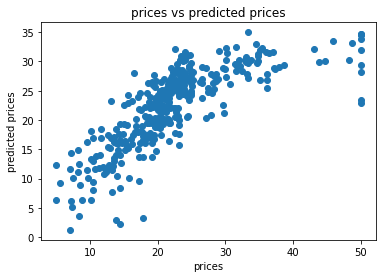

In [1075]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

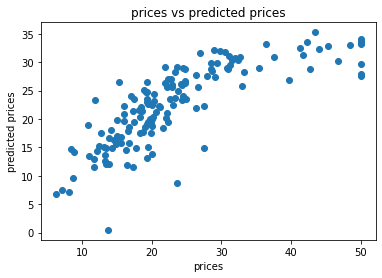

In [1076]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

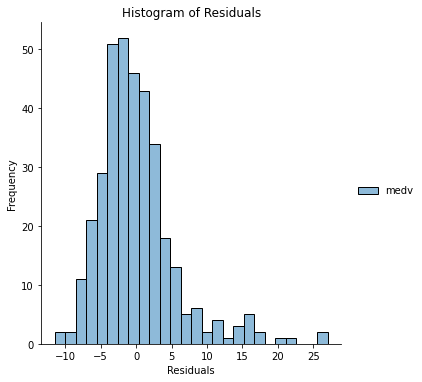

In [1077]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

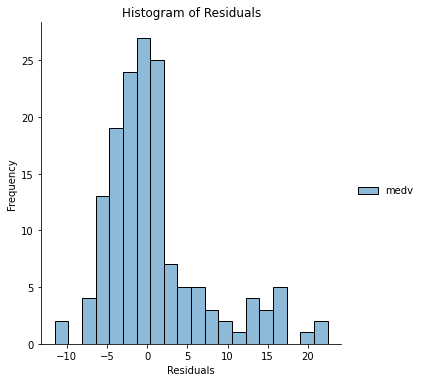

In [1078]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (lstat and ptratio)

In [1079]:
from sklearn.preprocessing import PolynomialFeatures

In [1080]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1081]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6639589423208894

R^2: 0.7270998342349705


In [1082]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.63700669738737

MAE: 4.045674059477197


In [1083]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 25.294089212208622

MSE: 28.496255034914856


In [1084]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 5.029322937753015

RMSE: 5.3381883663762615


In [1085]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1086]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6846031393946008

R^2: 0.7658202744111485


In [1087]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.5508335963139763

MAE: 3.747633848768665


In [1088]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 23.74018337075187

MSE: 24.45306387293307


In [1089]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.872389903399754

RMSE: 4.945003930527565


# tax and ptratio

In [1090]:
X = boston[['tax', 'ptratio']]
y = boston[['medv']]

In [1091]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1092]:
mlr26 = LinearRegression()
mlr26.fit(X_train, y_train)

LinearRegression()

In [1093]:
mlr26.intercept_

array([53.51124987])

In [1094]:
mlr26.coef_

array([[-0.01762651, -1.30401669]])

In [1095]:
coeffcients = pd.DataFrame([X_train.columns,mlr26.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,tax,"[-0.017626507317635345, -1.3040166921982586]"
1,ptratio,None


In [1096]:
y_pred_train = mlr26.predict(X_train)
y_pred_test = mlr26.predict(X_test)

In [1097]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.331052722396065

R^2: 0.3024170594151413

MAE: 5.056394523402153

MAE: 5.890555797185024

MSE: 50.35221658579442

MSE: 72.84166107846058

RMSE: 7.095929578694705

RMSE: 8.534732630754204


# Model(MLR) Evaluation (tax and ptratio)

Visualizing

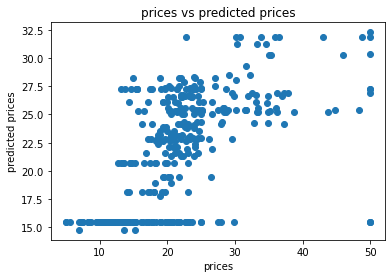

In [1098]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

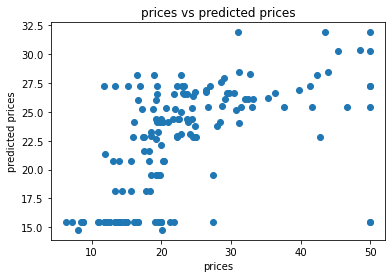

In [1099]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

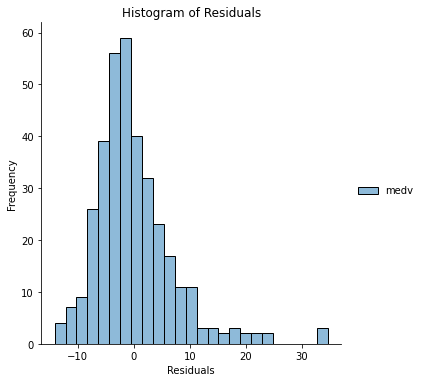

In [1100]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

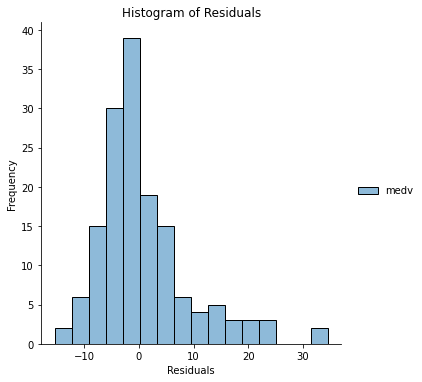

In [1101]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (lstat and ptratio)

In [1102]:
from sklearn.preprocessing import PolynomialFeatures

In [1103]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1104]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.38219738540860837

R^2: 0.38103788298430374


In [1105]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 4.804763637716705

MAE: 5.699893370543732


In [1106]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 46.502515368025534

MSE: 64.6320689985096


In [1107]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 6.819275281730863

RMSE: 8.03940725417674


In [1108]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1109]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.40254211273219964

R^2: 0.39952827588136575


In [1110]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 4.677400109086938

MAE: 5.519819240237787


In [1111]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 44.971150863119185

MSE: 62.70130083567845


In [1112]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 6.7060533000505735

RMSE: 7.918415298257503


# rm, lstat and tax

In [1113]:
X = boston[['rm', 'lstat', 'tax']]
y = boston[['medv']]

In [1114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1115]:
mlr31 = LinearRegression()
mlr31.fit(X_train, y_train)

LinearRegression()

In [1116]:
mlr31.intercept_

array([1.01257884])

In [1117]:
mlr31.coef_

array([[ 4.86559739, -0.5510785 , -0.00544067]])

In [1118]:
coeffcients = pd.DataFrame([X_train.columns,mlr31.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,rm,"[4.865597387804908, -0.5510785046189608, -0.00..."
1,lstat,None
2,tax,None


In [1119]:
y_pred_train = mlr31.predict(X_train)
y_pred_test = mlr31.predict(X_test)

In [1120]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.6375238906540743

R^2: 0.6582685075254813

MAE: 3.7319334809070943

MAE: 4.099636946189924

MSE: 27.28387748334383

MSE: 35.683627145175755

RMSE: 5.223397120968674

RMSE: 5.973577416019295


# Model(MLR) Evaluation (rm, lstat and tax)

Visualizing

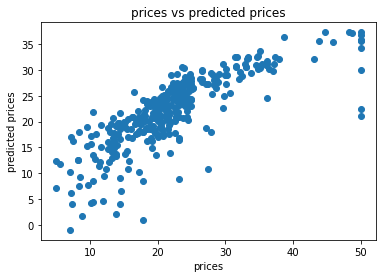

In [1121]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

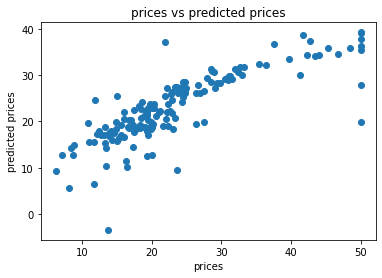

In [1122]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

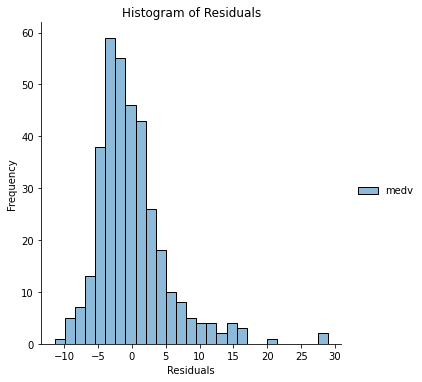

In [1123]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

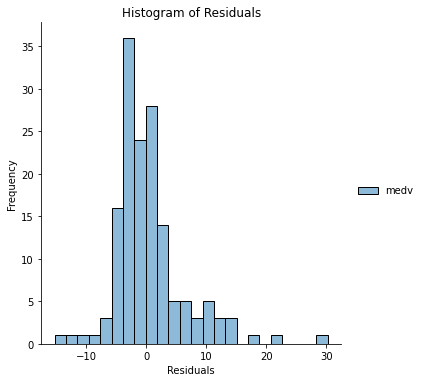

In [1124]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (rm, lstat and tax)

In [1125]:
from sklearn.preprocessing import PolynomialFeatures

In [1126]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1127]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.8108515841577129

R^2: 0.8629081496077374


In [1128]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.6487000604746838

MAE: 2.714450611868466


In [1129]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 14.237358189817874

MSE: 14.315140927213445


In [1130]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 3.7732423974372327

RMSE: 3.7835355062710123


In [1131]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1132]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.8387441633334557

R^2: 0.9093903569951722


In [1133]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.478599405420509

MAE: 2.298211160641384


In [1134]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 12.137860613829588

MSE: 9.46146547199728


In [1135]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 3.4839432564020885

RMSE: 3.075949523642623


# rm, lstat and ptratio

In [1137]:
X = boston[['rm', 'lstat', 'ptratio']]
y = boston[['medv']]

In [1138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1139]:
mlr32 = LinearRegression()
mlr32.fit(X_train, y_train)

LinearRegression()

In [1140]:
mlr32.intercept_

array([17.49349])

In [1141]:
mlr32.coef_

array([[ 4.31698504, -0.56690498, -0.81667408]])

In [1142]:
coeffcients = pd.DataFrame([X_train.columns,mlr32.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,rm,"[4.316985038743534, -0.5669049822733808, -0.81..."
1,lstat,None
2,ptratio,None


In [1143]:
y_pred_train = mlr32.predict(X_train)
y_pred_test = mlr32.predict(X_test)

In [1144]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.6651507550052007

R^2: 0.6926956516509609

MAE: 3.528580509374667

MAE: 3.8377892165442504

MSE: 25.204380482658074

MSE: 32.08874226713531

RMSE: 5.020396446761757

RMSE: 5.664692601292264


# Model(MLR) Evaluation (rm, lstat and ptratio)

Visualizing

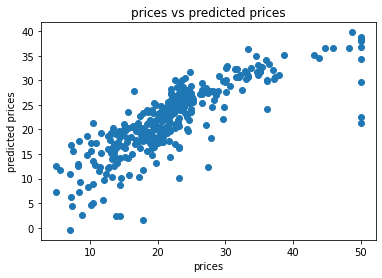

In [1145]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

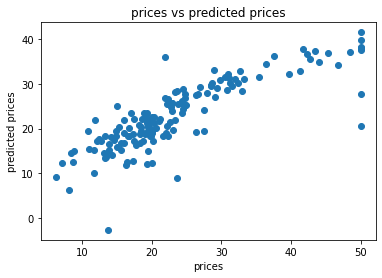

In [1146]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

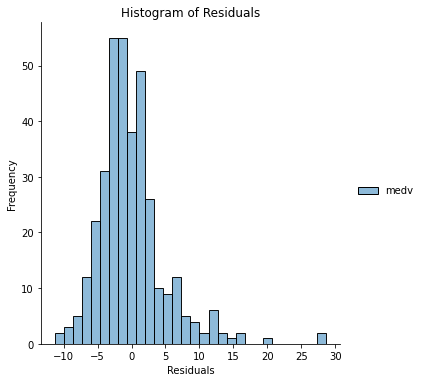

In [1147]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

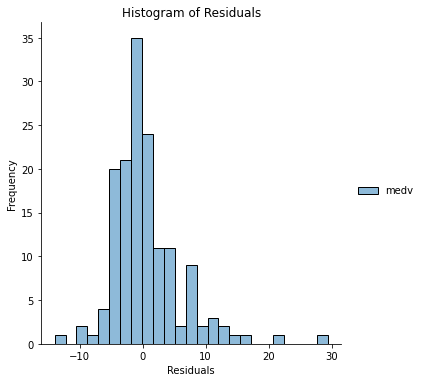

In [1148]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (rm, lstat and ptratio)

In [1150]:
from sklearn.preprocessing import PolynomialFeatures

In [1151]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1152]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.7913056985698661

R^2: 0.8275526460060141


In [1153]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.7225305812358793

MAE: 3.091722545097875


In [1154]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 15.708593214505603

MSE: 18.006965168866817


In [1155]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 3.9634067687414576

RMSE: 4.243461460749563


In [1156]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1157]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.8052998121916896

R^2: 0.8803979325776765


In [1158]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.5524211413074824

MAE: 2.550541473732174


In [1159]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 14.65524467179808

MSE: 12.488856525298427


In [1160]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 3.828216905009182

RMSE: 3.5339576292449273


# tax, lstat and ptratio

In [1161]:
X = boston[['tax', 'lstat', 'ptratio']]
y = boston[['medv']]

In [1162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1163]:
mlr33 = LinearRegression()
mlr33.fit(X_train, y_train)

LinearRegression()

In [1164]:
mlr33.intercept_

array([50.86819118])

In [1165]:
mlr33.coef_

array([[-6.89484998e-04, -7.82252544e-01, -9.99062923e-01]])

In [1166]:
coeffcients = pd.DataFrame([X_train.columns,mlr33.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,tax,"[-0.0006894849984592396, -0.7822525435721966, ..."
1,lstat,None
2,ptratio,None


In [1167]:
y_pred_train = mlr33.predict(X_train)
y_pred_test = mlr33.predict(X_test)

In [1168]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.5993582754255908

R^2: 0.6054756641317625

MAE: 3.896444973383585

MAE: 4.334070716852218

MSE: 30.156635006175826

MSE: 41.196259668312585

RMSE: 5.491505713934552

RMSE: 6.418431246676448


# Model(MLR) Evaluation (tax, lstat and ptratio)

Visualizing

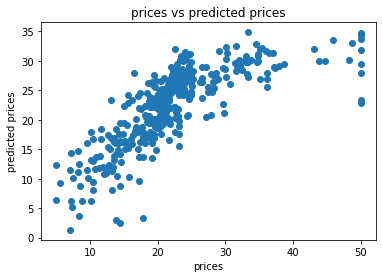

In [1169]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

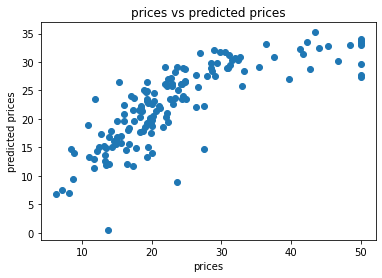

In [1170]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

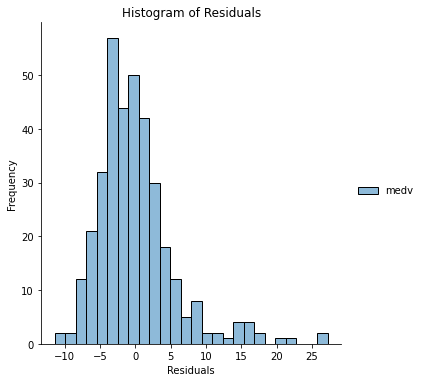

In [1171]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

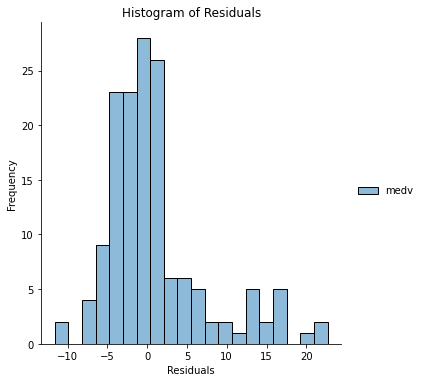

In [1172]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (tax, lstat and ptratio)

In [1173]:
from sklearn.preprocessing import PolynomialFeatures

In [1174]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1175]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.7203854621054832

R^2: 0.795028759730248


In [1176]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.35839435877503

MAE: 3.4291576290537065


In [1177]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 21.0468182530484

MSE: 21.403111724669166


In [1178]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.587681141170166

RMSE: 4.6263497192353675


In [1179]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1180]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.7660833188573316

R^2: 0.8270975210967508


In [1181]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.9927487295217805

MAE: 3.094116704006912


In [1182]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 17.60710266153353

MSE: 18.05448934478935


In [1183]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.196081822549881

RMSE: 4.2490574654609405


# tax, rm and ptratio

In [1184]:
X = boston[['tax', 'rm', 'ptratio']]
y = boston[['medv']]

In [1185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1186]:
mlr34 = LinearRegression()
mlr34.fit(X_train, y_train)

LinearRegression()

In [1187]:
mlr34.intercept_

array([-2.63245088])

In [1188]:
mlr34.coef_

array([[-0.01091466,  7.04088281, -0.79622751]])

In [1189]:
coeffcients = pd.DataFrame([X_train.columns,mlr34.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,tax,"[-0.010914660272814581, 7.040882810656984, -0...."
1,rm,None
2,ptratio,None


In [1190]:
y_pred_train = mlr34.predict(X_train)
y_pred_test = mlr34.predict(X_test)

In [1191]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.5695409780352403

R^2: 0.625251941434166

MAE: 3.7510446549739083

MAE: 4.1021913672174835

MSE: 32.40100771904437

MSE: 39.13121936292958

RMSE: 5.692188306709852

RMSE: 6.255495133315154


# Model(MLR) Evaluation (tax, rm and ptratio)

Visualizing

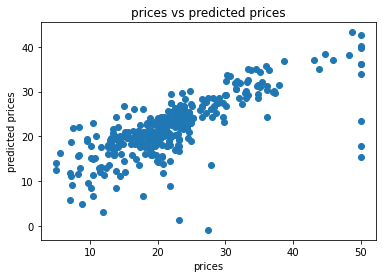

In [1192]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

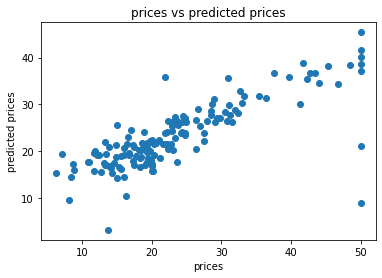

In [1193]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

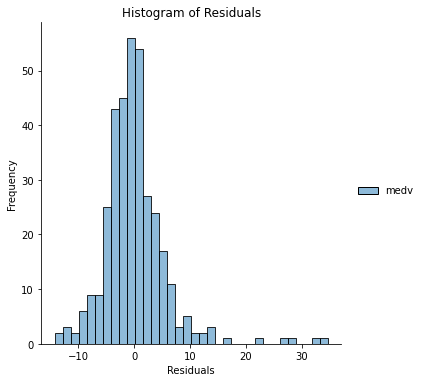

In [1194]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

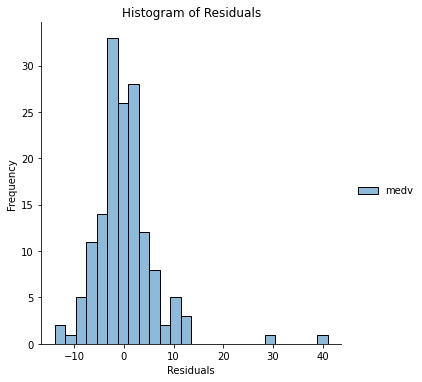

In [1195]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (tax, rm and ptratio)

In [1196]:
from sklearn.preprocessing import PolynomialFeatures

In [1197]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1198]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6766935373588223

R^2: 0.7326464403820856


In [1199]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.2541151763472187

MAE: 3.283142994089457


In [1200]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 24.335545678286014

MSE: 27.917078020114115


In [1201]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.933107101846261

RMSE: 5.283661421790208


In [1202]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1203]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.6992682957442289

R^2: 0.7514933639026711


In [1204]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 3.0859585422993843

MAE: 3.075408873444307


In [1205]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 22.636324885183427

MSE: 25.94908090380396


In [1206]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 4.75776469417976

RMSE: 5.094024038400679


# tax, rm, ptratio and lstat

In [1207]:
X = boston[['tax', 'rm', 'ptratio', 'lstat']]
y = boston[['medv']]

In [1208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1209]:
mlr41 = LinearRegression()
mlr41.fit(X_train, y_train)

LinearRegression()

In [1210]:
mlr41.intercept_

array([17.05404429])

In [1211]:
mlr41.coef_

array([[-1.64044285e-03,  4.34015160e+00, -7.77666120e-01,
        -5.47245256e-01]])

In [1212]:
coeffcients = pd.DataFrame([X_train.columns,mlr41.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,tax,"[-0.0016404428526191753, 4.340151595634072, -0..."
1,rm,None
2,ptratio,None
3,lstat,None


In [1213]:
y_pred_train = mlr41.predict(X_train)
y_pred_test = mlr41.predict(X_test)

In [1214]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.6657621897435644

R^2: 0.694046458878446

MAE: 3.514047601539714

MAE: 3.8084295206396215

MSE: 25.1583572826169

MSE: 31.947690878802465

RMSE: 5.015810730342294

RMSE: 5.6522288416873625


# Model(MLR) Evaluation (tax, rm, ptratio and lstat)

Visualizing

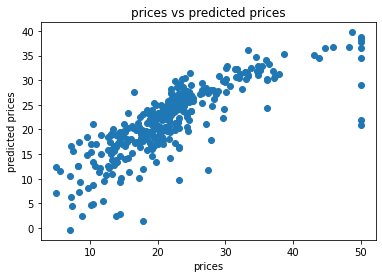

In [1215]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

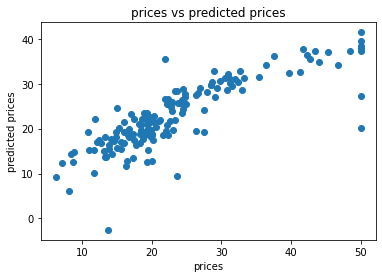

In [1216]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

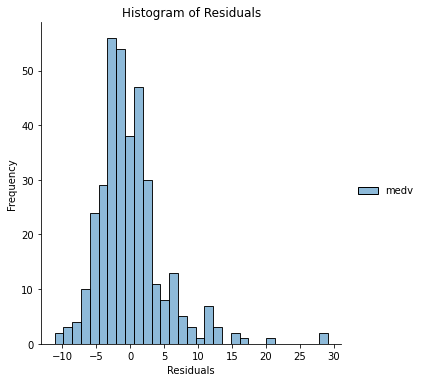

In [1217]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

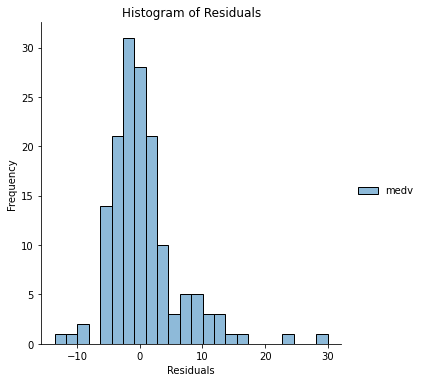

In [1218]:
sns.displot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial Regression (tax, rm, ptratio and lstat)

In [1219]:
from sklearn.preprocessing import PolynomialFeatures

In [1220]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1221]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.8268359352907475

R^2: 0.8834502429504563


In [1222]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.4451087521883523

MAE: 2.519339740666083


In [1223]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 13.034202818415825

MSE: 12.170134055546109


In [1224]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 3.6102912373402543

RMSE: 3.4885719220830333


In [1225]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1226]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.8630974553020632

R^2: 0.8220552824331752


In [1227]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 2.173952007485226

MAE: 3.3754319302615166


In [1228]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 10.304768122336656

MSE: 18.58100027050229


In [1229]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 3.210104067212877

RMSE: 4.31056843937111


# all

In [1230]:
X = boston.drop(['medv'], axis= 1)
# X = boston.iloc[:, 0:-1]
y = boston['medv']

In [1231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [1232]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [1233]:
mlr.intercept_

36.357041376595205

In [1234]:
mlr.coef_

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [1235]:
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-0.12257
1,zn,0.055678
2,indus,-0.008834
3,chas,4.693448
4,nox,-14.435783
5,rm,3.28008
6,age,-0.003448
7,dis,-1.552144
8,rad,0.32625
9,tax,-0.014067


In [1236]:
y_pred_train = mlr.predict(X_train)
y_pred_test = mlr.predict(X_test)

In [1237]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.7465991966746854

R^2: 0.7121818377409195


In [1238]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 3.08986109497113

MAE: 3.8590055923707407


In [1239]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 19.07368870346903

MSE: 30.053993307124127


In [1240]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 4.367343437774162

RMSE: 5.482152251362974


# Model(MLR) Evaluation (all)

Visualizing

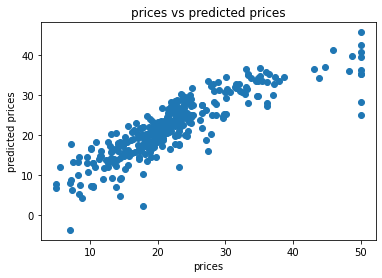

In [1241]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices vs predicted prices')
plt.show()

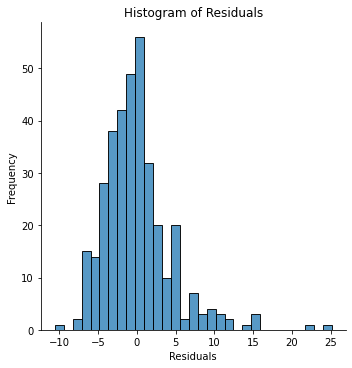

In [1242]:
sns.displot(y_train - y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

add new data

In [1243]:
mlr.predict(np.array([0.02, 2, 2.31, 0, 0.458, 6.421, 54.2, 4.0900, 2, 242, 18.7, 396.90, 4.03]).reshape(1, -1))

C:\Users\ATG\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names

  warnings.warn(


array([28.19022315])

In [1244]:
mlr.predict(np.array([[0.02, 2, 2.31, 0, 0.458, 6.421, 54.2, 4.0900, 2, 242, 18.7, 396.90, 4.03]]))


C:\Users\ATG\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names

  warnings.warn(


array([28.19022315])

# Polynomial Regression (all)

In [1245]:
from sklearn.preprocessing import PolynomialFeatures

In [1246]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1247]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 0.9280564047275941

R^2: 0.970477693887


In [1248]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 1.6452185511570876

MAE: 1.3984040768522963


In [1249]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 5.415254105065232

MSE: 3.0827213382465386


In [1250]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 2.32706985392902

RMSE: 1.7557680194850738


In [1251]:
poly_features = PolynomialFeatures(degree=3)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)
quadratic_train = LinearRegression()
quadratic_test = LinearRegression()
quadratic_train.fit(X_train_quadratic,y_train)
quadratic_test.fit(X_test_quadratic,y_test)
y_train_predicted = quadratic_train.predict(X_train_quadratic)
y_test_predicted = quadratic_test.predict(X_test_quadratic)

In [1252]:
print('R^2:', metrics.r2_score(y_train, y_train_predicted))
print('R^2:', metrics.r2_score(y_test, y_test_predicted))

R^2: 1.0

R^2: 1.0


In [1253]:
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MAE: 1.4232892228259345e-09

MAE: 2.7763873071918218e-12


In [1254]:
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))

MSE: 4.851456337113163e-18

MSE: 1.2411491060133286e-23


In [1255]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

RMSE: 2.202602174046226e-09

RMSE: 3.522994615399417e-12
